In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_csv('Crop_recommendation.csv')

In [141]:
df.sample(7)

,N,P,K,temperature,humidity,ph,rainfall,label
737,57,60,17,26.237731,67.885214,7.504608,73.586640,blackgram
1831,32,11,31,25.068720,93.314104,6.205932,134.841907,coconut
1255,40,140,195,14.978470,80.499799,6.294396,71.634374,grapes
346,0,65,15,23.461683,23.221976,5.645436,95.842534,kidneybeans
912,36,7,37,19.867118,86.355902,5.782436,108.316886,pomegranate
1304,93,22,52,26.587407,81.325632,6.932740,41.875400,watermelon
980,10,5,42,20.241049,91.087068,6.887006,109.253773,pomegranate


In [142]:
df['label'].value_counts().count()

np.int64(22)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


<Axes: ylabel='ph'>

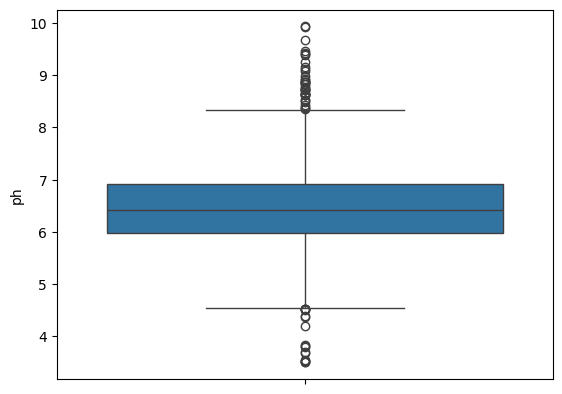

In [144]:
sns.boxplot(df['ph'])

In [145]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [147]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='label'), df['label'], test_size=0.2)

In [148]:
x_test

,N,P,K,temperature,humidity,ph,rainfall
575,27,59,20,28.009374,52.609500,4.397699,36.012030
1092,113,85,45,27.949725,76.637134,6.037431,109.092163
1093,105,93,46,25.010185,78.762609,5.760458,108.369051
379,5,65,16,21.327760,18.485229,5.866744,109.101326
1073,111,88,55,29.447954,78.349715,5.505394,96.450426
...,...,...,...,...,...,...,...
925,0,17,42,23.202426,91.194427,6.859841,109.094632
130,87,35,25,21.445269,63.162155,6.178056,65.889512
1242,11,132,197,15.990507,81.239666,5.734317,74.401989
107,89,60,19,25.191924,66.690290,5.913665,78.066396


In [149]:
le = LabelEncoder()
y_train1 = le.fit_transform(y_train)
y_test1 = le.fit_transform(y_test)

In [150]:
impute = ColumnTransformer([
    ('knn-impute', KNNImputer(n_neighbors=4), slice(0, None))
])

In [151]:
pipe = Pipeline([
    ('Impute', impute),
    ('Random-forest', RandomForestClassifier())
])

In [152]:
pipe.fit(x_train, y_train1)

Pipeline(steps=[('Impute',
                 ColumnTransformer(transformers=[('knn-impute',
                                                  KNNImputer(n_neighbors=4),
                                                  slice(0, None, None))])),
                ('Random-forest', RandomForestClassifier())])

In [153]:
from sklearn.metrics import accuracy_score, r2_score

In [154]:
y_pred = pipe.predict(x_test)
accuracy_score(y_test1, y_pred)

0.9931818181818182

In [155]:
columns = x_train.columns

In [161]:
predicted_label = pipe.predict([x_test.iloc[3]])
predicted_label

c:\Users\sudip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(


array([9])

In [157]:
x_test

,N,P,K,temperature,humidity,ph,rainfall
575,27,59,20,28.009374,52.609500,4.397699,36.012030
1092,113,85,45,27.949725,76.637134,6.037431,109.092163
1093,105,93,46,25.010185,78.762609,5.760458,108.369051
379,5,65,16,21.327760,18.485229,5.866744,109.101326
1073,111,88,55,29.447954,78.349715,5.505394,96.450426
...,...,...,...,...,...,...,...
925,0,17,42,23.202426,91.194427,6.859841,109.094632
130,87,35,25,21.445269,63.162155,6.178056,65.889512
1242,11,132,197,15.990507,81.239666,5.734317,74.401989
107,89,60,19,25.191924,66.690290,5.913665,78.066396


In [162]:
original_class = le.inverse_transform([predicted_label])[0]
original_class

c:\Users\sudip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'kidneybeans'

In [163]:
df.iloc[379]

N                        5
P                       65
K                       16
temperature       21.32776
humidity         18.485229
ph                5.866744
rainfall        109.101326
label          kidneybeans
Name: 379, dtype: object

In [165]:

import pickle
pickle.dump(pipe, open('model.pkl', 'wb'))
pickle.dump(columns, open('columns.pkl', 'wb'))
pickle.dump(le, open('label.pkl', 'wb'))